# Detecting STR frameshift mutations in cancer patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 400)
pd.get_option("display.max_rows")

400

In [3]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)
df_patient_variation = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide.tsv",
    sep="\t"
)

In [4]:
df_str_info.head()

,chr,start,end,period,repeat_id,msa,max_p_stretch,tmp_id,ref,in_segdup,region_type,neighbour_type
0,chr1,64174,64181,2,1099233.0,"AT,AT,AT,AT",4,chr1_64174,4,True,intron/intergenic,no_neighbour
1,chr1,64658,64666,1,1099234.0,"A,A,A,A,A,A,A,A,A",9,chr1_64658,9,True,intron/intergenic,no_neighbour
2,chr1,66161,66174,2,NaN,"TA,TA,TA,TA,TA,TA,TA",7,chr1_66161,7,True,intron/intergenic,neighbour_match
3,chr1,66176,66183,2,NaN,"TA,TA,TA,TA",4,chr1_66176,4,True,intron/intergenic,neighbour_match
4,chr1,66193,66200,2,NaN,"TA,TA,TA,TA",4,chr1_66193,4,True,intron/intergenic,neighbour_match


In [26]:
df_patient_variation[df_patient_variation["patient_len_diff"] > 0].head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
30,TCGA-AA-3489,chr1_2187286,11,11,10,10,1,11,.,2
106,TCGA-AA-3489,chr1_10117623,10,10,11,11,1,12,1106416,2
118,TCGA-AA-3489,chr1_11080554,10,10,5,5,1,11,1107512,10
119,TCGA-AA-3489,chr1_11080564,18,18,17,19,2,21,1107496,2
131,TCGA-AA-3489,chr1_11806287,10,10,9,9,3,10,1108021,2


In [6]:
df_patient_variation_filt = (
    df_patient_variation
        .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
        .query("not in_segdup and neighbour_type == 'no_neighbour' and period > 1")
        .loc[:, df_patient_variation.columns] 
)

df_patient_variation_filt.head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
1,TCGA-AA-3489,chr1_971311,3,3,3,3,4,3,1099283,0
2,TCGA-AA-3489,chr1_1043875,5,5,5,5,2,5,1099359,0
3,TCGA-AA-3489,chr1_1051937,4,4,4,4,2,4,1099381,0
4,TCGA-AA-3489,chr1_1090878,4,4,4,4,2,4,1099469,0
5,TCGA-AA-3489,chr1_1182416,4,4,4,4,2,4,1099502,0


In [7]:
print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

83


,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff
count,1.543994e+06,1.543994e+06,1.543994e+06,1.543994e+06,1.543994e+06,1.543994e+06,1.543994e+06
mean,4.540649e+00,4.554901e+00,4.540413e+00,4.554675e+00,2.620448e+00,4.557209e+00,4.389331e-02
std,2.106333e+00,2.202027e+00,2.113920e+00,2.223779e+00,9.871025e-01,2.208989e+00,5.780106e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
75%,5.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00
max,3.600000e+01,5.800000e+01,3.900000e+01,3.850000e+02,6.000000e+00,5.000000e+01,3.600000e+02


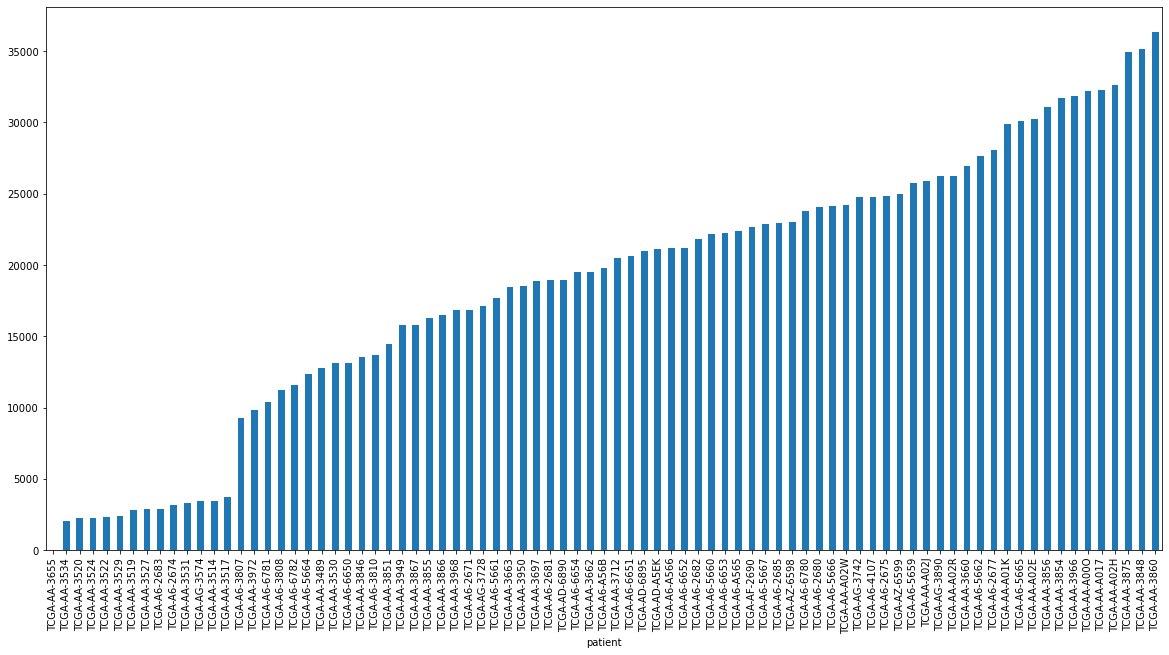

In [8]:
fig = plt.figure(figsize=(20, 10))

(df_patient_variation_filt
    .groupby("patient")
     .size()
     .sort_values()
     .plot(kind="bar")
)

plt.show()

In [9]:
df_patient_variation_filt = (
    df_patient_variation_filt
        .groupby('patient')
        .filter(lambda x: len(x) >= 5000)
        .reset_index()
)

print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

69


,index,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff
count,1.507026e+06,1.507026e+06,1.507026e+06,1.507026e+06,1.507026e+06,1.507026e+06,1.507026e+06,1.507026e+06
mean,1.287297e+06,4.543057e+00,4.557475e+00,4.542824e+00,4.557242e+00,2.618340e+00,4.559814e+00,4.406029e-02
std,7.579802e+05,2.111365e+00,2.207958e+00,2.119123e+00,2.230240e+00,9.859521e-01,2.215095e+00,5.817314e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
25%,6.332512e+05,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
50%,1.270908e+06,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
75%,1.945942e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00
max,2.615299e+06,3.600000e+01,5.800000e+01,3.900000e+01,3.850000e+02,6.000000e+00,5.000000e+01,3.600000e+02


In [10]:
df_potential_fs = (
    df_patient_variation_filt
        .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
        .query("region_type == 'CDS' and patient_len_diff > 0")
        .loc[:, df_patient_variation_filt.columns]
)

df_potential_fs.shape

(1541, 11)

In [11]:
def is_frameshift(allele_pair: tuple, period: int) -> bool:
    if (abs(allele_pair[0] - allele_pair[1]) * period) % 3 == 0:
        return False
    return True

def count_frameshifts(row) -> int:
    a_to_a = abs(row["allele_A_healthy"] - row["allele_A_tumor"]) + abs(row["allele_B_healthy"] -  row["allele_B_tumor"])
    a_to_b = abs(row["allele_A_healthy"] - row["allele_B_tumor"]) + abs(row["allele_B_healthy"] -  row["allele_A_tumor"])

    if a_to_a <= a_to_b:
        pair1 = (row["allele_A_healthy"], row["allele_A_tumor"])
        pair2 = (row["allele_B_healthy"], row["allele_B_tumor"])
    else:
        pair1 = (row["allele_A_healthy"], row["allele_B_tumor"])
        pair2 = (row["allele_B_healthy"], row["allele_A_tumor"])
    
    return is_frameshift(pair1, row["period"]) + is_frameshift(pair2, row["period"])


In [12]:
df_potential_fs["n_frameshifts"] = df_potential_fs.apply(lambda row: count_frameshifts(row), axis=1)
df_potential_fs.head(n=10)

,index,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,n_frameshifts
93,131,TCGA-AA-3489,chr1_11806287,10,10,9,9,3,10,1108021,2,0
2796,4507,TCGA-AA-3489,chr3_25607296,13,13,12,12,3,13,683057,2,0
2880,4619,TCGA-AA-3489,chr3_40462030,12,15,12,14,3,10,690639,1,0
3235,5148,TCGA-AA-3489,chr3_120411953,4,4,6,6,2,4,734302,4,2
4646,7494,TCGA-AA-3489,chr5_119193887,10,10,9,9,3,10,970329,2,0
5085,8187,TCGA-AA-3489,chr6_26458678,6,6,9,9,3,6,12548,6,0
6112,9801,TCGA-AA-3489,chr7_114631612,4,4,7,7,3,4,1413653,6,0
6524,10468,TCGA-AA-3489,chr8_76863213,7,7,10,10,3,7,.,6,0
7733,12345,TCGA-AA-3489,chr11_864443,9,9,8,8,3,9,364795,2,0
8756,13835,TCGA-AA-3489,chr12_56423650,7,7,5,5,3,5,.,4,0


In [13]:
df_potential_fs.describe()

,index,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff,n_frameshifts
count,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,1.321891e+06,8.095393,8.280337,8.110967,8.299805,3.005191,8.495133,3.579494,0.362103
std,7.122267e+05,4.817378,5.217285,5.041389,5.346044,0.963610,5.025985,2.334595,0.758479
min,1.310000e+02,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000
25%,7.097800e+05,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,0.000000
50%,1.342769e+06,7.000000,7.000000,7.000000,7.000000,3.000000,7.000000,2.000000,0.000000
75%,1.839996e+06,11.000000,12.000000,12.000000,12.000000,3.000000,12.000000,6.000000,0.000000
max,2.614997e+06,29.000000,47.000000,39.000000,44.000000,6.000000,42.000000,22.000000,2.000000


In [14]:
df_potential_fs.sort_values(by="patient_len_diff", ascending=False).head(n=50)

,index,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,n_frameshifts
695279,1168149,TCGA-AA-3856,chr4_20618997,4,4,15,15,2,4,93221,22,2
177855,293279,TCGA-AZ-6599,chr6_16327635,27,47,35,35,3,30,8007,20,0
1437416,2492013,TCGA-AD-A5EK,chr6_16327635,22,24,22,41,3,30,8007,17,0
458683,771005,TCGA-A6-6781,chr1_15928649,13,13,5,5,2,5,1111043,16,2
1040990,1795514,TCGA-AA-A017,chr17_7426367,12,12,4,4,3,7,479302,16,0
542688,893746,TCGA-A6-6781,chr13_45596503,11,11,4,4,3,4,1254253,14,0
1184106,2034110,TCGA-A6-6654,chr4_105942525,5,5,12,12,3,5,133936,14,0
1238146,2120746,TCGA-A6-6780,chr14_92071011,10,10,17,17,3,10,1481402,14,0
546965,906615,TCGA-AA-3530,chr1_193142016,5,5,11,11,2,5,1203881,12,0
485297,810967,TCGA-A6-A56B,chr5_37396520,11,11,5,5,3,5,.,12,0


In [15]:
df_potential_fs[df_potential_fs["n_frameshifts"] > 0].shape

(293, 12)

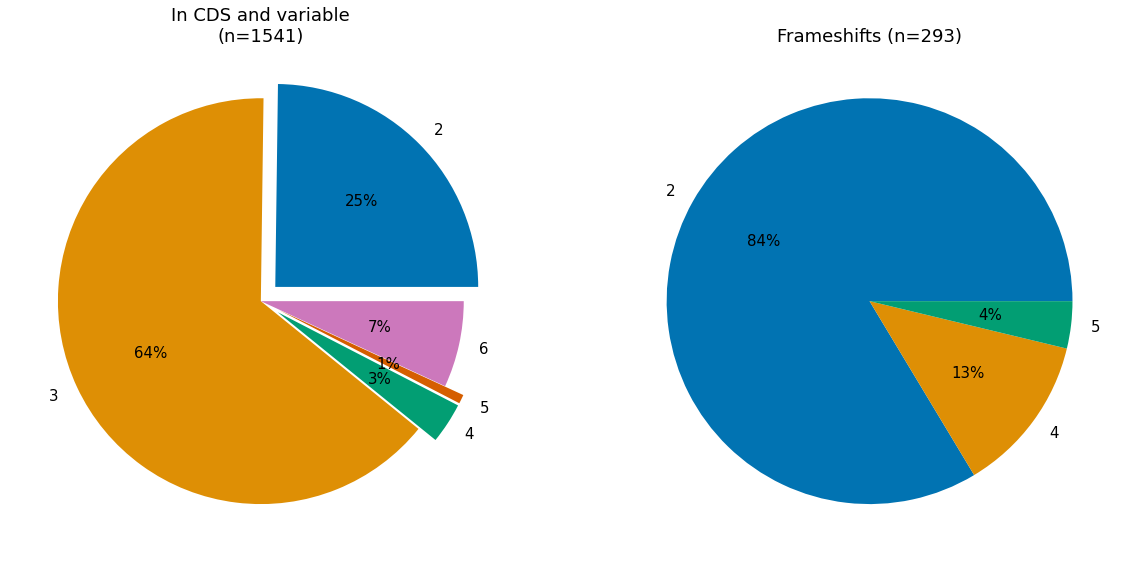

In [16]:
plt.rc('font', size=15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.pie(
    df_potential_fs.groupby("period").size(), 
    explode=[0.1, 0, 0.1, 0.1, 0],
    labels=df_potential_fs.groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:5], 
    autopct='%.0f%%'
)
ax1.set(title=f"In CDS and variable\n(n={df_potential_fs.shape[0]})")

ax2.pie(
    df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby("period").size(), 
    labels=df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:5], 
    autopct='%.0f%%'
)
ax2.set(title=f"Frameshifts (n={df_potential_fs[df_potential_fs['n_frameshifts'] > 0].shape[0]})")

plt.show()

In [17]:
df_clinical = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/oxana_tcga_clinical.csv", 
).loc[:, ["case_submitter_id", "gender", "MSI", "CMS"]]
df_clinical.columns = ["patient", "gender", "MSI", "CMS"]

In [18]:
df_fs = df_potential_fs[df_potential_fs["n_frameshifts"] > 0]

df_fs_summary = pd.DataFrame(
    {
        "frameshift_loci": df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby(["patient"]).size(),
        "frameshift_events": df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby(["patient"]).sum()["n_frameshifts"],
        "total_calls": df_patient_variation_filt.groupby("patient").size()
    }
)
df_fs_summary["perc_fs"] = (df_fs_summary["frameshift_loci"] / df_fs_summary["total_calls"]) * 100
df_fs_summary = df_fs_summary.merge(df_clinical, how="left", on="patient")


In [19]:
df_fs_summary

,patient,frameshift_loci,frameshift_events,total_calls,perc_fs,gender,MSI,CMS
0,TCGA-A6-2671,3.0,6.0,16876,0.017777,male,MSS,CMS4
1,TCGA-A6-2675,1.0,1.0,24822,0.004029,male,MSS,CMS4
2,TCGA-A6-2677,2.0,4.0,28040,0.007133,female,MSS,CMS2
3,TCGA-A6-2680,2.0,3.0,24059,0.008313,female,MSS,CMS2
4,TCGA-A6-2681,2.0,4.0,18925,0.010568,female,MSS,CMS4
5,TCGA-A6-2682,2.0,2.0,21836,0.009159,male,MSS,CMS4
6,TCGA-A6-2685,1.0,1.0,22921,0.004363,female,MSS,CMS4
7,TCGA-A6-3807,1.0,2.0,9246,0.010815,female,MSS,CMS4
8,TCGA-A6-3808,NaN,NaN,11208,NaN,male,MSS,CMS4
9,TCGA-A6-3810,2.0,4.0,13715,0.014583,male,MSS,CMS4


In [20]:
df_fs_summary.groupby("MSI").describe().transpose()
df_fs_summary.groupby("MSI").size()

MSI
MSI    12
MSS    57
dtype: int64

In [21]:
from scipy.stats import ttest_ind
df_fs_summary = df_fs_summary.dropna()
ttest_ind(a=df_fs_summary[df_fs_summary["MSI"] == "MSI"]["frameshift_loci"], b=df_fs_summary[df_fs_summary["MSI"] == "MSS"]["frameshift_loci"])


Ttest_indResult(statistic=5.260656227435114, pvalue=1.7739469010065987e-06)

In [22]:
df_fs = (
    df_fs
        .merge(df_clinical, how="left", on="patient")
)

In [23]:
df_fs[df_fs['MSI'] == 'MSI'].groupby('period').size()

period
2    112
4      7
5      1
dtype: int64

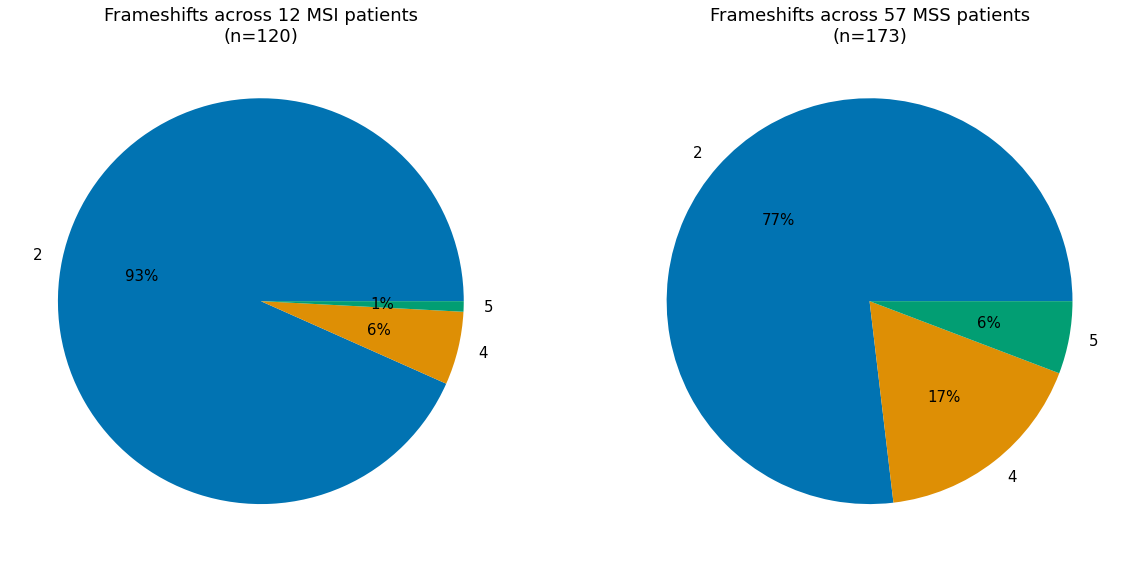

In [25]:
plt.rc('font', size=15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.pie(
    df_fs[df_fs["MSI"] == "MSI"].groupby("period").size(), 
    labels=df_fs[df_fs["MSI"] == "MSI"].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:5], 
    autopct='%.0f%%'
)
ax1.set(title=f"Frameshifts across 12 MSI patients\n(n={df_fs[df_fs['MSI'] == 'MSI'].groupby('period').size().sum()})")

ax2.pie(
    df_fs[df_fs["MSI"] == "MSS"].groupby("period").size(), 
    labels=df_fs[df_fs["MSI"] == "MSS"].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:5], 
    autopct='%.0f%%'
)
ax2.set(title=f"Frameshifts across 57 MSS patients\n(n={df_fs[df_fs['MSI'] == 'MSS'].groupby('period').size().sum()})")

plt.show()